In [1]:
import numpy as np
from noise import Noise
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
from qe import QE
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [2]:
%time _qe = QE(exp="SO", N0_path="cache/_N0")
_noise = Noise()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
%time _noise.setup_cmb_noise(N0_file, 0)

CPU times: user 6min 51s, sys: 7.38 s, total: 6min 59s
Wall time: 58.1 s
CPU times: user 3.37 ms, sys: 3.07 ms, total: 6.44 ms
Wall time: 2.39 ms


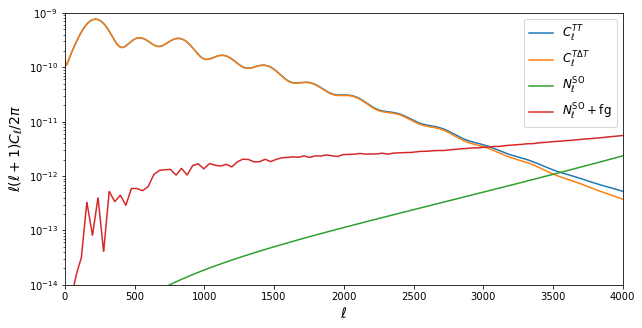

In [3]:
Ls = np.arange(1,4001)
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].lenCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{TT}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].gradCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{T\Delta T}$")
plt.semilogy(Ls[10:], (Ls[10:]*(Ls[10:]+1))*_qe.cmb["TT"].N_spline(Ls[10:])/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}$")
N = np.load("cache/_N0/SO_base/exp/N_TT.npy")[:4001]
Ls = np.arange(np.size(N))
plt.semilogy(Ls, (Ls*(Ls+1))*N/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}+\mathrm{fg}$")
plt.ylim(1e-14, 1e-9)
plt.xlim(0, 4000)
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})

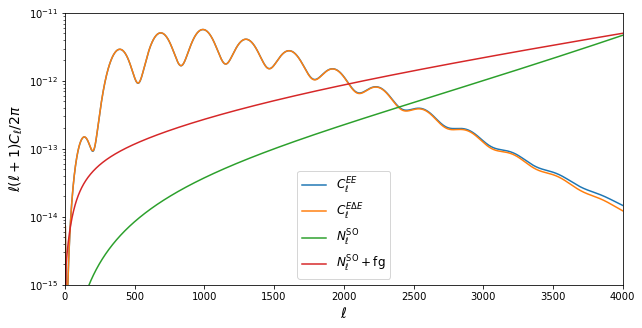

In [4]:
Ls = np.arange(1,4001)
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].lenCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{EE}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].gradCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{E\Delta E}$")
plt.semilogy(Ls[10:], (Ls[10:]*(Ls[10:]+1))*_qe.cmb["EE"].N_spline(Ls[10:])/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}$")
N = np.load("cache/_N0/SO_base/exp/N_EE.npy")[:4001]
Ls = np.arange(np.size(N))
plt.semilogy(Ls, (Ls*(Ls+1))*N/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}+\mathrm{fg}$")
plt.ylim(1e-15, 1e-11)
plt.xlim(0, 4000)
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})

In [5]:
def get_N0(N0_file, typ):
    dict = {"TT": (1,8), "TE": (2,9), "EE": (3,10), "TB": (4,11), "EB": (5,12), "Pol": (6,13), "MV": (7,14)}
    phi_index, curl_index = dict[typ]
    df = pd.read_csv(N0_file, sep="\s+", header=None)
    return np.array(df[phi_index]), np.array(df[curl_index])

In [6]:
Lmax = 3000
Lmin = 30
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="TT", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 17.8 s, sys: 26.2 ms, total: 17.9 s
Wall time: 17.7 s


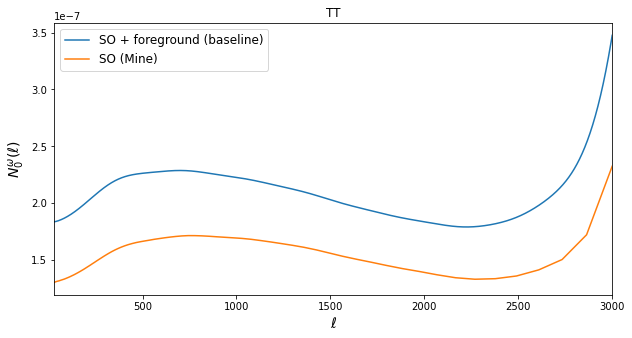

In [8]:
N0_file = "data/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "TT")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO (Mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("TT")
plt.show()

In [9]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 50)
%time N0_curl_mine = _qe.gmv_normalisation(fields="EB", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 37.5 s, sys: 120 ms, total: 37.7 s
Wall time: 37.3 s


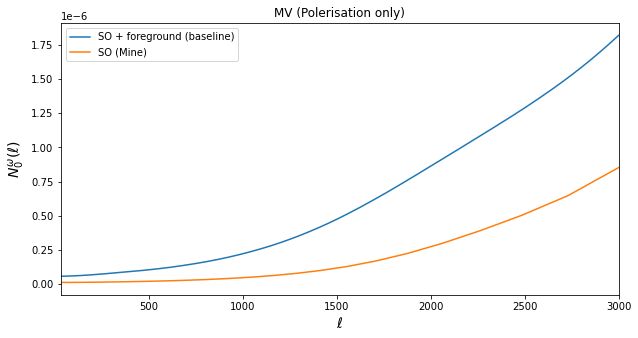

In [96]:
N0_file = "data/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "Pol")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO (Mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("MV (Polerisation only)")
plt.show()

In [3]:
Lmax = 3000
Lmin = 30
_qe = QE(exp="SO_base", N0_path="cache/_N0")

In [112]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="TT", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 17.8 s, sys: 33.5 ms, total: 17.8 s
Wall time: 17.8 s


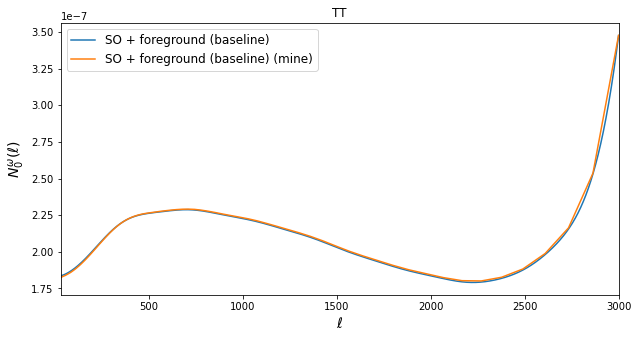

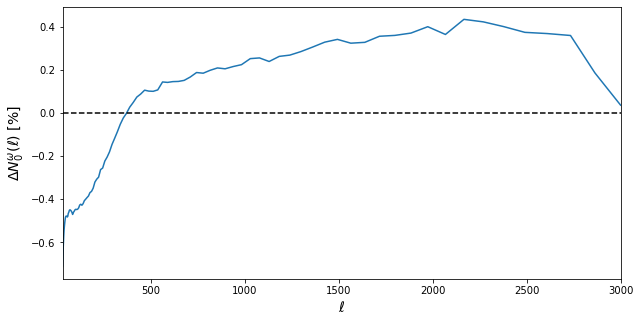

In [113]:
N0_file = "data/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "TT")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[3:], N0_curl[3:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO + foreground (baseline) (mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("TT")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()

In [4]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 20)
%time N0_curl_mine = _qe.gmv_normalisation(fields="TEB", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 1min 9s, sys: 208 ms, total: 1min 9s
Wall time: 1min 9s


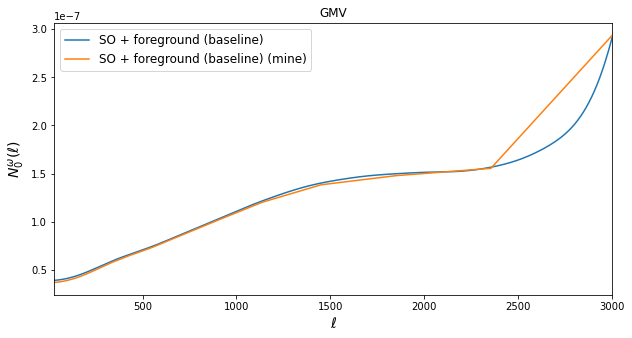

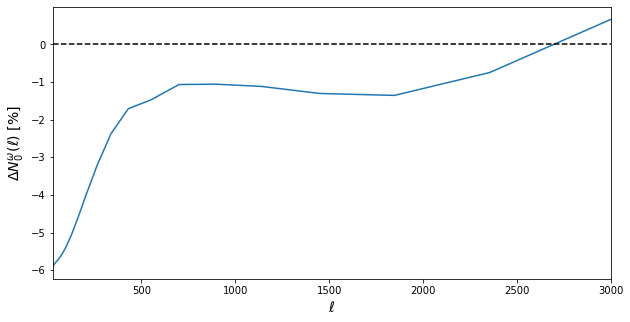

In [5]:
N0_file = "data/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "MV")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO + foreground (baseline) (mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("GMV")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()